## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
data = pd.read_csv(r'synthetic_fraud_dataset.csv')

## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [4]:
print("Authentication_Method: ", data['Authentication_Method'].unique())
print('Device_Type: ', data['Device_Type'].unique())
print('Transaction_Type: ', data['Transaction_Type'].unique())
print('Location: ', data['Location'].unique())

Authentication_Method:  ['Biometric' 'Password' 'OTP' 'PIN']
Device_Type:  ['Laptop' 'Mobile' 'Tablet']
Transaction_Type:  ['POS' 'Bank Transfer' 'Online' 'ATM Withdrawal']
Location:  ['Sydney' 'New York' 'Mumbai' 'Tokyo' 'London']


In [5]:
# Calculating Fraud Counts in each city for Data Visualization before encoding
cities = ['Mumbai', 'Sydney', 'Tokyo', 'London', 'New York']
for city in cities:
    fraud_city_count = data[(data['Location'] == city) & (data['Fraud_Label'] == 1)].shape[0]
    print(f"{city}: {fraud_city_count}")

Mumbai: 3156
Sydney: 3194
Tokyo: 3315
London: 3181
New York: 3221


In [6]:
# Calculating Fraud Transactions for Transaction Type for Visualization before encoding
tr_types = ['POS', 'Bank Transfer', 'Online', 'ATM Withdrawal']
for tr_type in tr_types:
    print(f"{tr_type}: {data[(data['Transaction_Type'] == tr_type) & (data['Fraud_Label'] == 1)].shape[0]}")

POS: 3995
Bank Transfer: 3995
Online: 4031
ATM Withdrawal: 4046


In [7]:
# Calculating Fraud Transactions for Authentication Methods for Visualization before encoding
auth_mehtods = ['Biometric', 'Password', 'OTP', 'PIN']
for method in auth_mehtods:
    print(f"{method}: {data[(data['Authentication_Method'] == method) & (data['Fraud_Label'] == 1)].shape[0]}")

Biometric: 4038
Password: 4030
OTP: 4021
PIN: 3978


In [8]:
# One Hot Encoding on Authentication_Method, Device_Type, Transaction_Type
data = pd.get_dummies(data, columns=['Authentication_Method', 'Device_Type', 'Transaction_Type'])

In [9]:
data.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Timestamp',
       'Account_Balance', 'Location', 'Merchant_Category', 'IP_Address_Flag',
       'Previous_Fraudulent_Activity', 'Daily_Transaction_Count',
       'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type',
       'Card_Age', 'Transaction_Distance', 'Risk_Score', 'Is_Weekend',
       'Fraud_Label', 'Authentication_Method_Biometric',
       'Authentication_Method_OTP', 'Authentication_Method_PIN',
       'Authentication_Method_Password', 'Device_Type_Laptop',
       'Device_Type_Mobile', 'Device_Type_Tablet',
       'Transaction_Type_ATM Withdrawal', 'Transaction_Type_Bank Transfer',
       'Transaction_Type_Online', 'Transaction_Type_POS'],
      dtype='object')

In [10]:
# Label Encoding on Location
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])

## Machine Learning Process

In [11]:
# Separate Feature and Target Variable
X = data.drop(['Fraud_Label', 'Transaction_ID', 'User_ID', 'Timestamp', 'IP_Address_Flag', 'Card_Type', 'Card_Age', 'Is_Weekend', 'Merchant_Category'], axis=1)
y = data['Fraud_Label']

In [12]:
# Splitting Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Fitting Data into Model for training
model = LogisticRegression(max_iter=20000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=20000)

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [15]:
# Check for Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

0.201

In [ ]:
feature_names = [
    "Transaction_Amount", "Account_Balance", "Location", "Previous_Fraudulent_Activity",
    "Daily_Transaction_Count", "Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d",
    "Transaction_Distance", "Risk_Score",
    "Authentication_Method_Biometric", "Authentication_Method_OTP", "Authentication_Method_PIN", "Authentication_Method_Password",
    "Device_Type_Laptop", "Device_Type_Mobile", "Device_Type_Tablet",
    "Transaction_Type_ATM Withdrawal", "Transaction_Type_Bank Transfer", "Transaction_Type_Online", "Transaction_Type_POS"
]

print("\nWELCOME TO FRAUD TRANSACTION DETECTION SYSTEM")
print("================================================")
# User Inputs
transaction_amount = float(input("Enter Transaction Amount: "))
account_balance = float(input("Enter Account Balance: "))
location = int(input("Enter Location (encoded as an integer): "))
previous_fraud = int(input("Enter Previous Fraudulent Activity (0: No, 1: Yes): "))
daily_transaction_count = int(input("Enter Daily Transaction Count: "))
avg_transaction_amount_7d = float(input("Enter Average Transaction Amount (last 7 days): "))
failed_transaction_count_7d = int(input("Enter Failed Transaction Count (last 7 days): "))
transaction_distance = float(input("Enter Transaction Distance (in km): "))
risk_score = float(input("Enter Risk Score (0-1 range): "))

# Encoded Inputs
auth_method = input("Enter Authentication Method (Biometric/OTP/PIN/Password): ").lower()
authentication_methods = {
    "biometric": [1, 0, 0, 0],
    "otp": [0, 1, 0, 0],
    "pin": [0, 0, 1, 0],
    "password": [0, 0, 0, 1]
}
authentication_method_biometric, authentication_method_otp, authentication_method_pin, authentication_method_password = authentication_methods.get(auth_method, [0, 0, 0, 0])

device_type = input("Enter Device Type (Laptop/Mobile/Tablet): ").lower()
device_types = {
    "laptop": [1, 0, 0],
    "mobile": [0, 1, 0],
    "tablet": [0, 0, 1]
}
device_type_laptop, device_type_mobile, device_type_tablet = device_types.get(device_type, [0, 0, 0])

transaction_type = input("Enter Transaction Type (ATM Withdrawal/Bank Transfer/Online/POS): ").lower()
transaction_types = {
    "atm withdrawal": [1, 0, 0, 0],
    "bank transfer": [0, 1, 0, 0],
    "online": [0, 0, 1, 0],
    "pos": [0, 0, 0, 1]
}
transaction_type_atm, transaction_type_bank_transfer, transaction_type_online, transaction_type_pos = transaction_types.get(transaction_type, [0, 0, 0, 0])

# Creating final input array
X_new = np.array([transaction_amount, account_balance, location, previous_fraud, daily_transaction_count, avg_transaction_amount_7d, failed_transaction_count_7d, transaction_distance, 
    risk_score,authentication_method_biometric, authentication_method_otp, authentication_method_pin, authentication_method_password, device_type_laptop, 
    device_type_mobile, device_type_tablet, transaction_type_atm, transaction_type_bank_transfer, transaction_type_online, transaction_type_pos]).reshape(1, -1)

# Convert NumPy array to Pandas DataFrame with feature names
X_new_df = pd.DataFrame(X_new, columns=feature_names)

# Prediction
prediction = model.predict(X_new)

# Final Result
print("RESULT: ")
if prediction[0] == 1:
    print("\t\tFraud Detected!")
else:
    print("\t\tTransaction is Safe.")



WELCOME TO FRAUD TRANSACTION DETECTION SYSTEM
RESULT: 
		Transaction is Safe.


c:\Users\Syed_Sharjeel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Data Visualization

#### Relation of Fraud Transaction and Location of Transaction

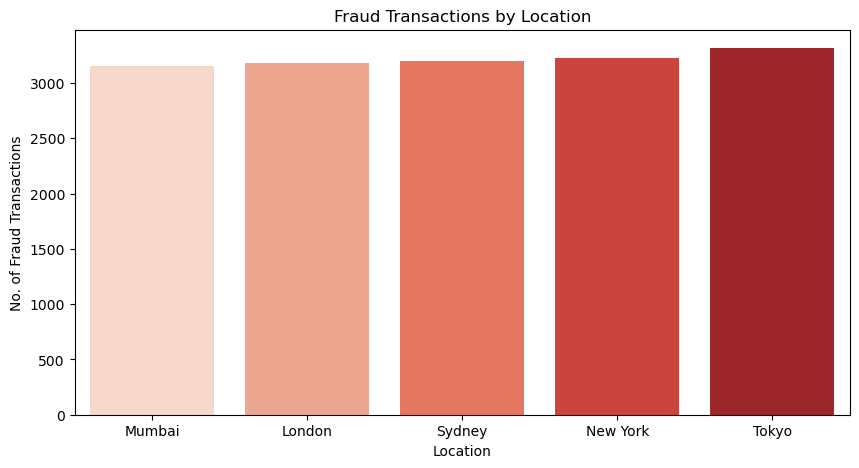

In [42]:
fraud_counts_locations = pd.DataFrame({'city': ['Mumbai', 'London', 'Sydney', 'New York', 'Tokyo'],'Transactions': [3156, 3181, 3194, 3221, 3315]})
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_counts_locations['city'], y=fraud_counts_locations['Transactions'], palette='Reds', hue=fraud_counts_locations['city'])
plt.xlabel('Location')
plt.ylabel('No. of Fraud Transactions')
plt.title('Fraud Transactions by Location')
plt.show()

##### Following Result can be obtained from Above Graph
1. Fraud Transactions are mostly done from `Tokyo`. 
2. Least number of Fraud Transactions done from `Mumbai`.

#### Relation of Fraud Transaction and Transaction Type

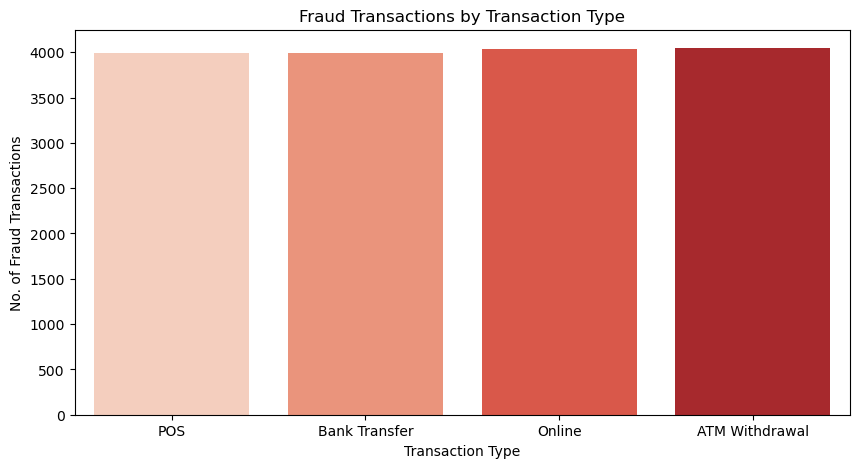

In [43]:
fraud_counts_tr_types = pd.DataFrame({'tr_type': ['POS', 'Bank Transfer', 'Online', 'ATM Withdrawal'],'Transactions': [3995, 3995, 4031, 4046]})
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_counts_tr_types['tr_type'], y=fraud_counts_tr_types['Transactions'], palette='Reds', hue=fraud_counts_tr_types['tr_type'])
plt.xlabel('Transaction Type')
plt.ylabel('No. of Fraud Transactions')
plt.title('Fraud Transactions by Transaction Type')
plt.show()

##### Following Result can be Obtained from above Graph
1. Most of Fraud Transactions done from `ATM Withdrawal`.
2. Least number of Fraud Transactions done from `POS` Method.<br><br>
##### `Result:` 
`POS` is the safest method of Transaction among the four described above

#### Relation of Fraud Transaction and Authnetication System

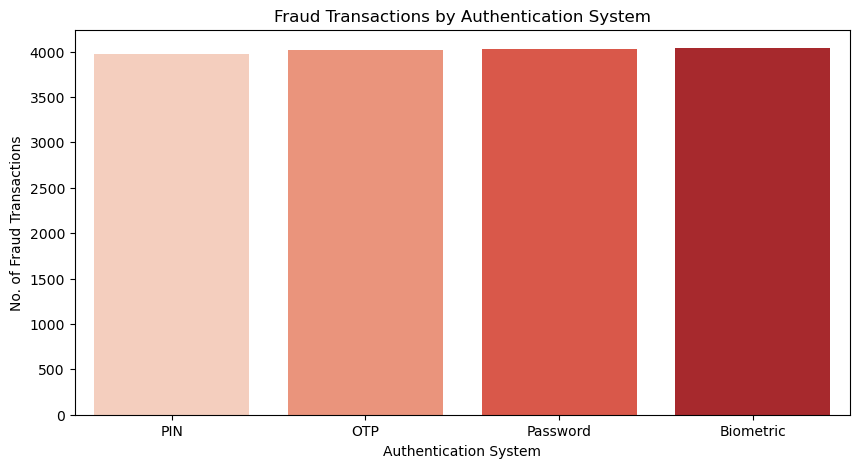

In [44]:
fraud_counts_auth = pd.DataFrame({'auth_system': ['PIN', 'OTP', 'Password', 'Biometric'], 'Transactions': [3978, 4021, 4030, 4038]})
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_counts_auth['auth_system'], y=fraud_counts_auth['Transactions'], palette='Reds', hue=fraud_counts_auth['auth_system'])
plt.xlabel('Authentication System')
plt.ylabel('No. of Fraud Transactions')
plt.title('Fraud Transactions by Authentication System')
plt.show()

##### Following Result can be described from above graph:
1. Most of Fraud Transactions proceed after `biometric` authentication System.
2. Least Number of Fraud Transactions proceed after `PIN` authentication system.
##### `RESULT: ` 
`PIN` Authentication System before transaction is the most safe method out of the above four shown

## Final Result
<div class = "alert alert-info">
By Analyzing the Dataset and doing multiple tests, visualizations, Result can be conculde as:<br>
Fraud Transactions can be reduced if we use the method of <strong>POS</strong> in our system, which will be accessible after authentication by <strong>PIN</strong>
</div>